In [122]:
# Setup
%pylab inline
import matplotlib
import numpy as np
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


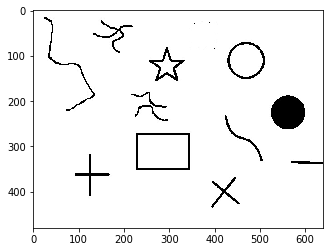

In [123]:
# Open Image
filename = 'sobel.jpg'
im = Image.open(filename)
matplotlib.pyplot.imshow(im) # Check that image loaded properly

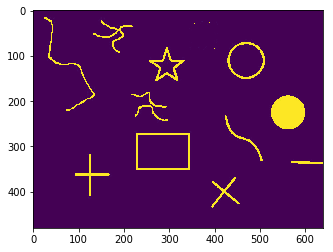

In [124]:
# Image Prep
im = np.array(im) # Change to Numpy Array
im = im[:,:,0] # From RGB to Grayscale
im = np.invert(im) # Invert Colors
matplotlib.pyplot.imshow(im) # Make sure numpy inverted colors

## Sobel Algorithm 1

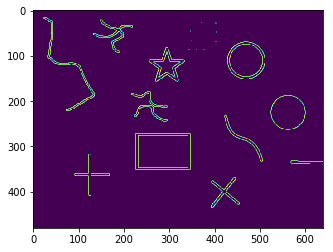

In [125]:
# Sobel Algorithm
w, h = im.shape # Get Width and Height
imtot = np.zeros((w,h)) # Initialize New Image
for i in range(w-1): # Sobel Algoritm
    for j in range(h-1):
        if i > 0 and i < w-1 and j > 0 and j < h-1:
            x = im[i+1][j+1] + im[i+1][j]*2 + im[i+1][j+1] - im[i-1][j+1] - im[i-1][j]*2 - im[i-1][j-1]
            y = im[i-1][j-1] + im[i][j-1]*2 + im[i+1][j-1] - im[i-1][j+1] - im[i][j+1]*2 - im[i+1][j+1]
            imtot[i][j] = np.sqrt(x**2 + y**2)
matplotlib.pyplot.imshow(imtot) # Show Results of Sobel

## Sobel Algorithm 2

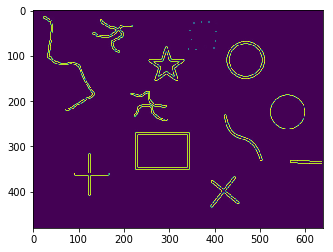

In [126]:
# Sobel Algorithm 2
kernelx = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])
kernely = np.array([[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]])
m, n = kernelx.shape # Get Kernel Shape
imconv = np.zeros((w,h))
assert kernelx.shape == kernely.shape
for a in range(w-m+1):
    for b in range(h-n+1):
        imconv[a][b] = np.sqrt( np.sum( im[a:a+m, b:b+n]*kernelx )**2 + np.sum( im[a:a+m, b:b+n]*kernely )**2 )
matplotlib.pyplot.imshow(imconv) # Show Results of Sobel